# Project 3: Statistical Data Analysis
#### *Telecommmunications Plan Revenue Analysis*

## Initialization

In [ ]:
# load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st

## Load the Data

In [3]:
# load the data files into different DataFrames
calls = pd.read_csv('megaline_calls.csv')

internet = pd.read_csv('megaline_internet.csv')

messages = pd.read_csv('megaline_messages.csv')

plans = pd.read_csv('megaline_plans.csv')

users = pd.read_csv('megaline_users.csv')

## Plans

### Prepare Data

In [ ]:
# print info about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# print a sample of data for plans
plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


The columns `usd_monthly_pay` and `usd_per_gb` should be converted to float values to reflect the dollar amount with cents (and also for the sake of uniformity with the `usd_per_message` and `usd_per_minute` fields).

Additionally, while perhaps not necessarily a problem, `usd_per_gb` is in terms of gb while `mb_per_month_included` are in terms of gb. It could be ideal to convert one metric or another into the same unit of measurement.

### Fix Data

In [6]:
# convert usd_per_gb and usd_monthly_pay to float values
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype(float)
plans['usd_per_gb'] = plans['usd_per_gb'].astype(float)

### Enrich Data

In [7]:
# create column to convert mb_per_month_included_to gb_per_month_included
plans['gb_per_month_included'] = (plans['mb_per_month_included']/1024).astype(int)

## Users

### Prepare Data

In [ ]:
# print info about the users' DataFrame
users.info()

# check for duplicate values
users.duplicated().sum()

# describe the dataframe
users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB



,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [9]:
# print a sample of data for users
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
469,1469,Rory,Nixon,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,surf,NaN
477,1477,Magaly,Rivas,52,"Riverside-San Bernardino-Ontario, CA MSA",2018-08-24,ultimate,NaN
71,1071,Isa,Roy,29,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-23,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
491,1491,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18


The `reg_date` and `churn_date` columns are both object data types but should be datetime data types.

Only 6.8% of users in this sample had churned at the time when the sample was extracted. This means only 34 were churned at the point of the extraction and the rest of the values are NaN. This is to be expected, but we may have to replace the NaN values with a different value later.

The median and mean value of the `age` column in this sample is 46 and 45.48, respectively. The distribution of customers by age is therefore just ever so slightly right-skewed (median > mean), but otherwise seems to be fairly normally distributed.

The `city` object represents the MSA the customer lives in and therefore contains the names of multiple cities and even multiple states in some cases.


### Fix Data

In [10]:
# convert reg_date and churn_date to datetime data types
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

### Enrich Data

In [11]:
# create a column for the month the user registered in
users['reg_month'] = (users['reg_date'].dt.month).astype('int')

# create a column for whether the customer churned or not
users['is_churned'] = ~users['churn_date'].isna()

## Calls

### Prepare Data

In [12]:
# print the general/summary information about the calls' DataFrame
calls.info()

# check for duplicate values
calls.duplicated().sum()

print()
# describe the dataframe
calls['duration'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB



count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [13]:
# print a sample of data for calls
calls.sample(5)

,id,user_id,call_date,duration
96896,1346_121,1346,2018-09-20,6.82
42380,1155_356,1155,2018-03-15,5.64
43816,1159_412,1159,2018-10-27,0.00
30183,1113_507,1113,2018-08-06,7.09
135228,1491_22,1491,2018-05-11,2.66


The median and mean value of the `duration` (of a call) column is 5.98 minutes and 5.83 minutes, respectively. When rounded up (since users pay for the length of their call rounded up to the next minute), the duration data follows a normal distribution.

The (call) `id` is an object because it has underscores within the otherwise numeric data. We can remove the underscores and convert the column to be type int to follow best practices for the data type that generally numeric ids should be.

The `call_date` should be a datetime data type.

The duration of a user's call is sometimes 0.00, which may reflect a call that was made but that didn't go through (perhaps the party being called did not answer). This shouldn't interfere with calculations related to the cost of a call since the call has no duration to round up to the next nearest minute. It would however, affect the call volume and average call duration rate. It may be intentional to include these calls in the calculation, however. Ideally, we would clarify with the relevant business partner(s) at Megaline if we should include calls of no duration in our volume of calls and avg. call duration metrics.

### Fix Data

In [14]:
# convert call_date to a datetime data type
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

# replace '_' with '' in the id column and convert the column to an int data type
calls['id'] = calls['id'].replace('_','').astype(int)

### Enrich Data

In [15]:
# create a new version of duration that is rounded up to the next minute - store this value as an int
calls['duration_rounded_up'] = np.ceil(calls['duration']).astype(int)

# create column for the month that the call was made
calls['call_month'] = calls['call_date'].dt.month

We created a version of the duration field that is rounded up to the next minute since this is how customers are charged for the length of their calls.

## Messages

### Prepare Data

In [16]:
# print the general/summary information about the messages' DataFrame
messages.info()

# check for duplicate values
messages.duplicated().sum()

# describe the data
messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [17]:
# print a sample of data for messages
messages.sample(5)

,id,user_id,message_date
42081,1271_59,1271,2018-12-08
66580,1434_105,1434,2018-09-11
11562,1078_29,1078,2018-11-08
17831,1115_655,1115,2018-12-16
72383,1470_11,1470,2018-09-18


The message_date column should be a datetime data type. Similar to the calls dataframe, the message id is an object because it contains underscores within the otherwise numeric value. I can convert the id field to be an int data type after replacing the '_' value in the column with ''.

### Fix Data

In [18]:
# convert message_date to datetime data type
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

# replace '_' with '' for values within id and then convert column to int data type
messages['id'] = messages['id'].replace('_','').astype(int)

### Enrich Data

In [19]:
# create column for the month that the message was sent
messages['message_month'] = messages['message_date'].dt.month

## Internet

### Prepare Data

In [20]:
# print the general/summary information about the internet DataFrame
internet.info()

# check for duplicate values
internet.duplicated().sum()

# describe internet
internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [21]:
# print a sample of data for the internet traffic
internet.sample(5)

,id,user_id,session_date,mb_used
30191,1138_427,1138,2018-05-08,467.03
43458,1193_349,1193,2018-12-24,174.01
98322,1465_194,1465,2018-11-15,26.44
93761,1438_3,1438,2018-10-14,936.05
94251,1439_304,1439,2018-12-09,40.75


Again, the (internet) `id` column is an object data type because there are '_' characters within otherwise numeric values. We replaced '_' with '' in the id field and convert it to be the int data type.

The `session_date` column is an object data type but should be a datetime data type.

The `mb_used` values should not rounded up at this point because they are only rounded up after they are totaled for the month.

### Fix Data

In [22]:
# convert session_date to a datetime data type
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enrich Data

In [23]:
# create column for the month that the session happened
internet['session_month'] = internet['session_date'].dt.month

# for the id column, replace '_' with '' and convert column to be an int data type
internet['id'] = internet['id'].replace('_','').astype(int)

# create a gb_used column from the converted mb_used field
internet['gb_used'] = internet['mb_used']/1025

## Study Plan Conditions

In [24]:
# print out the plan conditions and make sure they are clear for you
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0             20.0        10.0             0.03            0.03      surf   
1             70.0         7.0             0.01            0.01  ultimate   

   gb_per_month_included  
0                     15  
1                     30  


## Aggregate Data Per User

In [25]:
# calculate the number of calls and amount of minutes spent by each user per month. Save the result.
num_calls_mins_per_user_mo = calls.groupby(['user_id', 'call_month'])['duration_rounded_up'].agg(['count', 'sum']).reset_index()

# rename the columns
num_calls_mins_per_user_mo.columns = ['user_id','month','num_calls','mins_spent']

In [27]:
# calculate the number of messages sent by each user per month. Save the result.
num_msg_per_user_mo = messages.groupby(['user_id','message_month'])['id'].count().reset_index()

# rename columns to reflect transformed data
num_msg_per_user_mo.columns = ['user_id','month','msgs_sent']

In [28]:
# calculate the volume of internet traffic used by each user per month. Save the result.
int_traffic_per_user_mo = internet.groupby(['user_id','session_month'])['gb_used'].sum().reset_index()

# rename columns to reflect transformed data
int_traffic_per_user_mo.columns = ['user_id','month','monthly_gb_used']

# round monthly_gb_used up and store it as an int in a new col
int_traffic_per_user_mo['monthly_gb_used'] = np.ceil(int_traffic_per_user_mo['monthly_gb_used']).astype(int)

In [29]:
# merge the data for calls, minutes, messages, internet based on user_id and month
df = users.merge(num_calls_mins_per_user_mo, on='user_id', how='outer').merge(num_msg_per_user_mo, on=['user_id','month'], how='outer').merge(int_traffic_per_user_mo, on=['user_id','month'], how='outer')

# fill missing values with 0
df.fillna(0, inplace=True)

In [30]:
# add the plan information
df = plans.merge(df, how='inner', left_on='plan_name', right_on='plan')

# drop the redundant column plan
df.drop(columns=['plan'], inplace=True)

In [ ]:
# calculate the difference between actual plan usage and included usage across calls, messages, and sessions
df['call_overage'] = df['mins_spent'] - df['minutes_included']
df['msg_overage'] = df['msgs_sent'] - df['messages_included'] 
df['session_overage'] = df['monthly_gb_used'] - df['gb_per_month_included']

#create function to calculate monthly revenue per row of the df
def monthly_revenue(row):
    
    call_overage = row['call_overage']
    usd_per_minute = row['usd_per_minute']
    msg_overage = row['msg_overage']
    usd_per_message = row['usd_per_message']
    session_overage = row['session_overage']
    usd_per_gb = row['usd_per_gb']
    plan = row['plan_name']
    usd_monthly_pay = row['usd_monthly_pay']
    
    if call_overage > 0:
        call_overage_cost = call_overage * usd_per_minute
    else: call_overage_cost = 0
    if msg_overage > 0:
        msg_overage_cost = msg_overage * usd_per_message
    else: msg_overage_cost = 0
    if session_overage > 0:
        session_overage_cost = session_overage * usd_per_gb
    else: session_overage_cost = 0
    monthly_revenue = session_overage_cost + msg_overage_cost + call_overage_cost + usd_monthly_pay
    return monthly_revenue

# verify that the function operates as intended
row = df.iloc[0]
print(row)
print(monthly_revenue(row))

# apply the monthly_revenue function to the df and create a new monthly_revenue col to store the output of the function in for each row
df['monthly_revenue'] = df.apply(monthly_revenue, axis=1)

messages_included                                     50
mb_per_month_included                              15360
minutes_included                                     500
usd_monthly_pay                                     20.0
usd_per_gb                                          10.0
usd_per_message                                     0.03
usd_per_minute                                      0.03
plan_name                                           surf
gb_per_month_included                                 15
user_id                                             1001
first_name                                        Mickey
last_name                                      Wilkerson
age                                                 28.0
city                     Seattle-Tacoma-Bellevue, WA MSA
reg_date                             2018-08-13 00:00:00
churn_date                                             0
reg_month                                            8.0
is_churned                     

## Study Client Behavior

### Calls

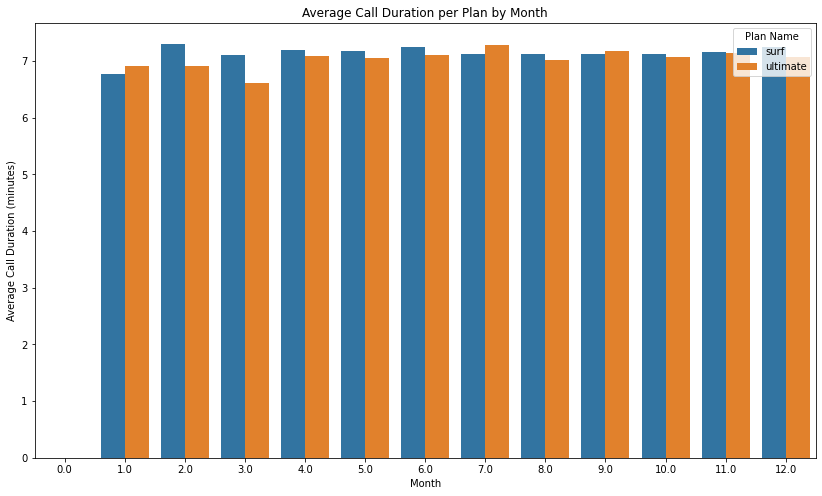

In [ ]:
# sum totals of mins_spent and num_calls per plan, month
summary_calls = df.groupby(['plan_name','month'])[['mins_spent', 'num_calls']].sum().reset_index()

# rename columns
summary_calls.columns = ['plan_name', 'month', 'total_mins', 'total_num_calls']

# calculate average call duration
summary_calls['avg_call_duration'] = summary_calls['total_mins']/summary_calls['total_num_calls']

# plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=summary_calls, x='month', y='avg_call_duration', hue='plan_name')
plt.title('Average Call Duration per Plan by Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.legend(title='Plan Name')
plt.show()

The average duration of calls does not differ much by plan or month. Users of both plans therefore typically have a similar call duration length on average--around 7 minutes long.

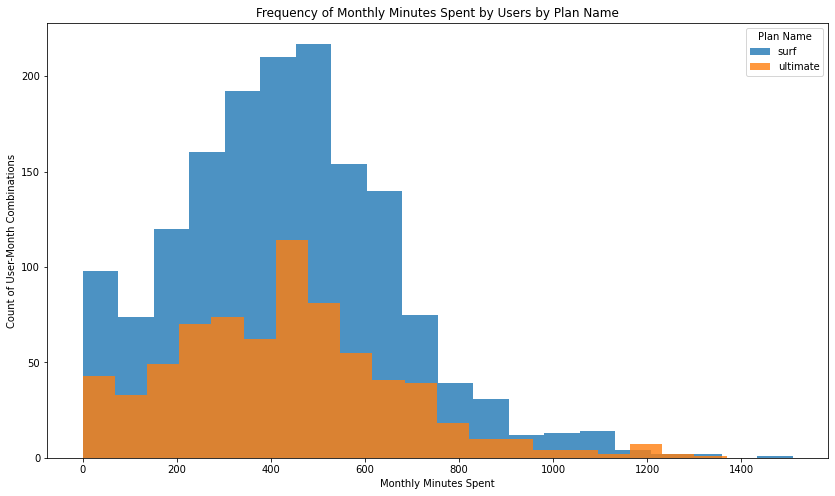

In [35]:
# compare the number of minutes users of each plan require each month
df.groupby('plan_name')['mins_spent'].plot.hist(alpha=0.8, legend=True, bins=20, figsize=(14,8))

# plot a histogram 
plt.title('Frequency of Monthly Minutes Spent by Users by Plan Name')
plt.xlabel('Monthly Minutes Spent')
plt.ylabel('Count of User-Month Combinations')
plt.legend(['surf', 'ultimate'])
plt.legend(title='Plan Name')
plt.show()

The median number of monthly minutes spent by users on both plans appears to be in a similar range of 420-450 minutes--the median of the ultimate plan is lower than that of the surf plan. 

The Surf plan appears to have slightly more variance in the monthly minutes spent and definitely has many more users on its plan given the comparative frequency of most all its values along the x-axis versus the Ultimate plan.

In [36]:
# calculate the mean, variance, and standard deviation of the monthly minutes spent on calls
statistics = df.groupby('plan_name')['mins_spent'].agg(['mean', 'var', 'std'])
statistics

,mean,var,std
plan_name,,,
surf,432.877407,53709.823754,231.753800
ultimate,431.048679,57666.609048,240.138729


We can confirm that the Surf plan and Ultimate plan have very similar mean values for the monthly minutes spent (436.5 and 434.7, respectively). The Ultimate plan has a larger variation and a larger standard deviation. 

In [ ]:
# calculate the monthly call duration
df['monthly_call_duration'] = df['mins_spent']/df['num_calls']

# calculate the mean, variance, and standard deviation of the monthly call duration per plan
statistics = df.groupby('plan_name')['monthly_call_duration'].agg(['mean', 'var', 'std'])
statistics

,mean,var,std
plan_name,,,
surf,7.158130,1.227523,1.107936
ultimate,7.078557,0.915475,0.956804


The mean of the average monthly call duration for both plans is about the same whereas the Surf plan has a slightly higher variance and standard deviation.

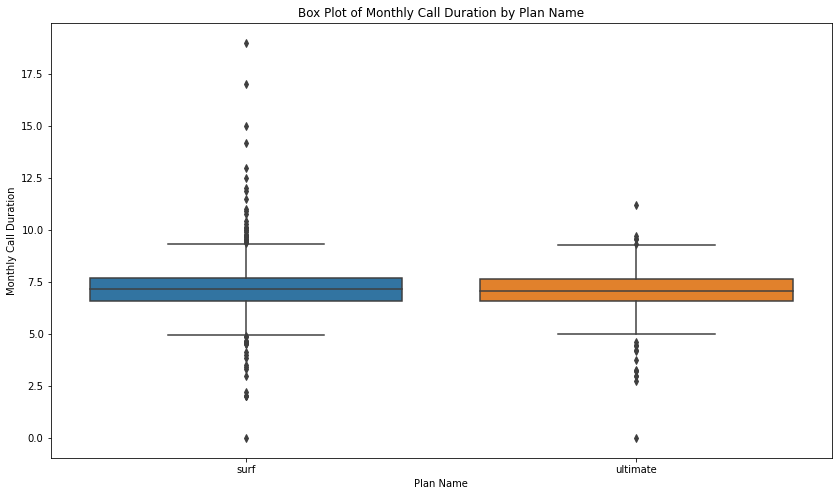

In [ ]:
# plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(14, 8))
sns.boxplot(x='plan_name', y='monthly_call_duration', data=df)

plt.xlabel('Plan Name')
plt.ylabel('Monthly Call Duration')
plt.title('Box Plot of Monthly Call Duration by Plan Name')
plt.show()

The interquartile range of call duration for both plans are very similar while the Surf plan has more outlier values (hence its greater variance and standard deviation) vs. the Ultimate plan.

Ultimately, users on the Surf and Ultimate plan have very similar calling behavior, however there is greater variance in users of the Surf plan in avg. call duration while there is greater variance in users of the Ultimate plan in monthly minutes spent on calls. 

Users on the Surf plan often exceed the monthly included number of minutes on their plan while users on the Ultimate plan do not.

### Messages

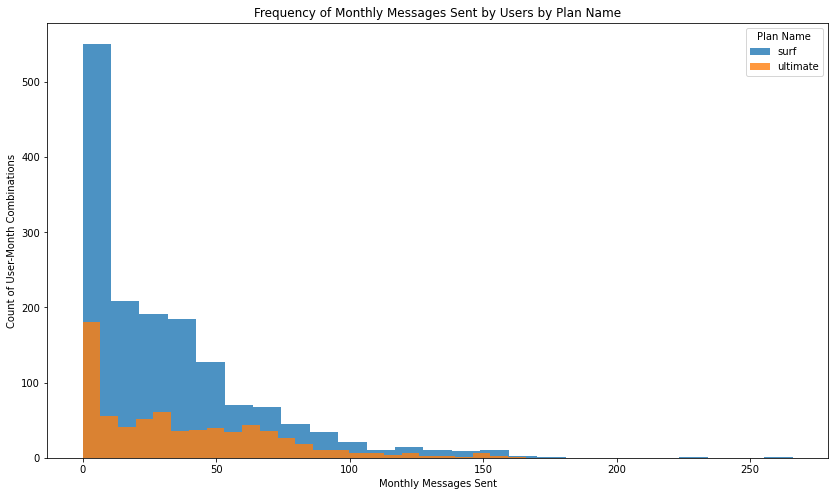

In [ ]:
# compare the number of messages users of each plan send each month and plot a histogram
df.groupby('plan_name')['msgs_sent'].plot.hist(alpha=0.8, 
                                               legend=True, 
                                               bins=25, 
                                               figsize=(14,8)
                                               )
plt.legend(['surf', 'ultimate'])
plt.legend(title='Plan Name')
plt.title('Frequency of Monthly Messages Sent by Users by Plan Name')
plt.xlabel('Monthly Messages Sent')
plt.ylabel('Count of User-Month Combinations')

# show the plot
plt.show()

In [41]:
# compare the number of messages users of each plan tend to send each month
summary_msgs = df.groupby('plan_name')['msgs_sent'].agg(['mean','var', 'std']).reset_index()
summary_msgs

,plan_name,mean,var,std
0,surf,30.639923,1130.402695,33.621462
1,ultimate,37.410292,1211.824462,34.811269


From the monthly messages sent histogram and relevant information about the mean, variance, and standard deviation of this metric between the two plans, we can conclude that the Ultimate plan has a higher average number of monthly messages sent, by about 6.5 messages, but there is a very similar variance and standard deviation between the two populations.

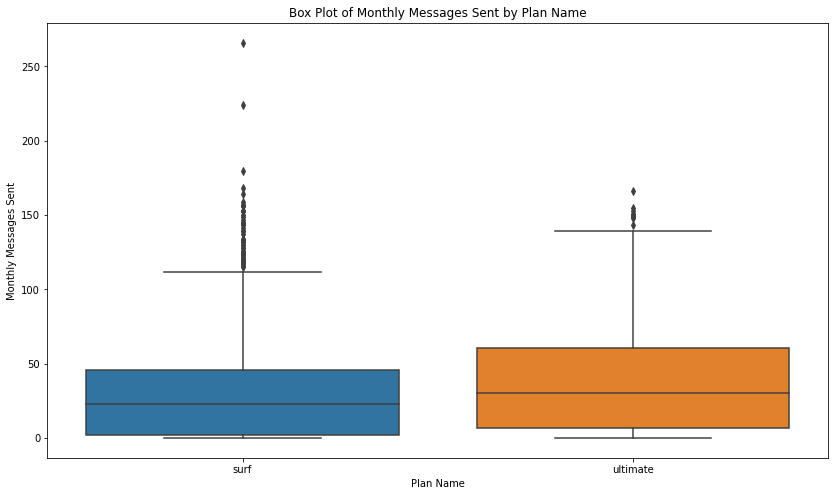

In [ ]:
# plot a boxplot to visualize the distribution of the monthly messages sent
plt.figure(figsize=(14, 8))
sns.boxplot(x='plan_name', 
            y='msgs_sent', 
            data=df
            )
plt.xlabel('Plan Name')
plt.ylabel('Monthly Messages Sent')
plt.title('Box Plot of Monthly Messages Sent by Plan Name')

# show the plot
plt.show()

Users of the Ultimate plan have a higher 25% quartile, median, and 75% quartile value than users of the Surf plan while Surf users have more outlier values than the users of the Ultimate plan. This reflects the higher variance seen among Surf plan users.

Overall, users of both plans have similar messaging behavior, yet Surf users often exceed the the number of included messages in their plans while Ultimate users do not.

### Internet

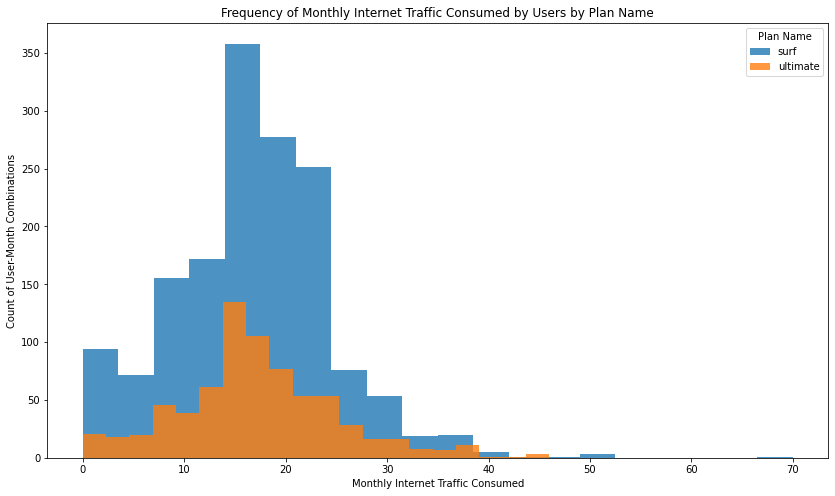

In [ ]:
# compare the number of internet traffic consumed by users each month by plan and plot a histogram
df.groupby('plan_name')['monthly_gb_used'].plot.hist(alpha=0.8, 
                                                     legend=True, 
                                                     bins=20, 
                                                     figsize=(14,8)
                                                     )
plt.title('Frequency of Monthly Internet Traffic Consumed by Users by Plan Name')
plt.xlabel('Monthly Internet Traffic Consumed')
plt.ylabel('Count of User-Month Combinations')
plt.legend(['surf', 'ultimate'])
plt.legend(title='Plan Name')

# show the plot
plt.show()

In [44]:
# compare the amount of internet traffic consumed by users per plan
summary_internet = df.groupby('plan_name')['monthly_gb_used'].agg(['mean','var', 'std']).reset_index()
summary_internet

,plan_name,mean,var,std
0,surf,16.464056,60.727994,7.792817
1,ultimate,17.208623,59.374243,7.705468


The histogram of the frequency of monthly gb of internet traffic consumed, along with the metric's mean, variance, and standard deviation by plan, indicate that users' internet traffic consumption among plans is very similar. 

The distribution of monthly internet traffic consumed is slightly right-skewed for users of the Ultimate plan (median > mean).

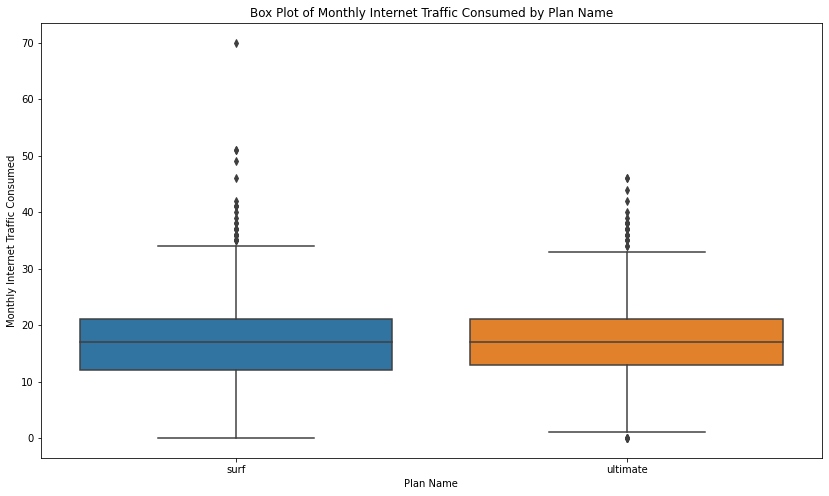

In [ ]:
# plot a boxplot to visualize the distribution of the monthly internet traffic consumed
plt.figure(figsize=(14, 8))
sns.boxplot(x='plan_name', 
            y='monthly_gb_used', 
            data=df
            )
plt.xlabel('Plan Name')
plt.ylabel('Monthly Internet Traffic Consumed')
plt.title('Box Plot of Monthly Internet Traffic Consumed by Plan Name')

# show the plot
plt.show()

Users' monthly internet traffic consumed (in gb) is very similar between plans although users' of the Surf plan often exceed the 15 gb of monthly data included in their plan while users of the Ultimate plan do not exceed their included 30 gb of monthly data.

## Revenue

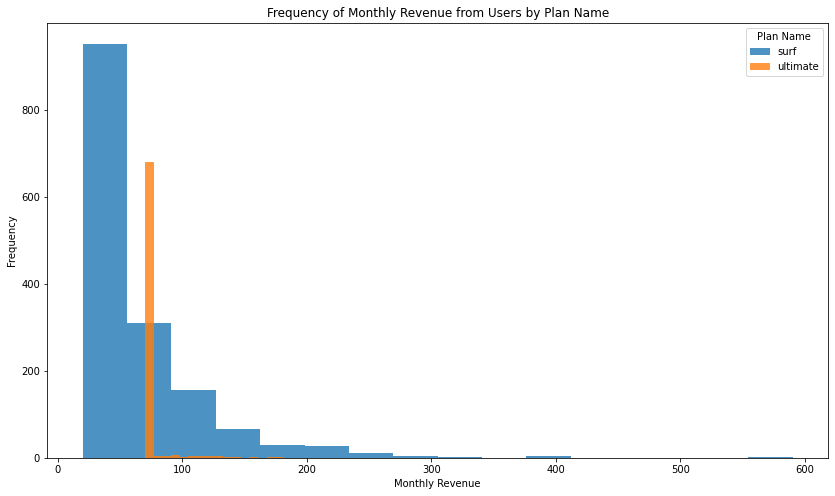

In [ ]:
# compare the monthly revenue generated by users each month by plan and plot a histogram
df.groupby('plan_name')['monthly_revenue'].plot.hist(alpha=0.8, 
                                                     legend=True, 
                                                     bins=16, 
                                                     figsize=(14,8))
plt.title('Frequency of Monthly Revenue from Users by Plan Name')
plt.xlabel('Monthly Revenue')
plt.legend(['surf', 'ultimate'])
plt.legend(title='Plan Name')

# show the plot
plt.show()

In [47]:
# compare the amount of internet traffic consumed by users per plan
summary_revenue = df.groupby('plan_name')['monthly_revenue'].agg(['mean','var', 'std']).reset_index()
print(summary_revenue)

  plan_name       mean          var        std
0      surf  59.668755  2837.547385  53.268634
1  ultimate  72.239221   126.282526  11.237550


From the histogram detailing monthly revenue by plan along with the mean, variance, and standard deviation of this metric by plan, we can see that the Ultimate plan has a higher mean revenue of about 12.25 dollars monthly, but has a significantly lower number users in on that plan. 

Additionally, users on the Surf plan have a significantly larger variance and standard deviation around the mean monthly revenue for their plan--it's very common for users to pay above the minimum monthly charge of $20 for that plan.

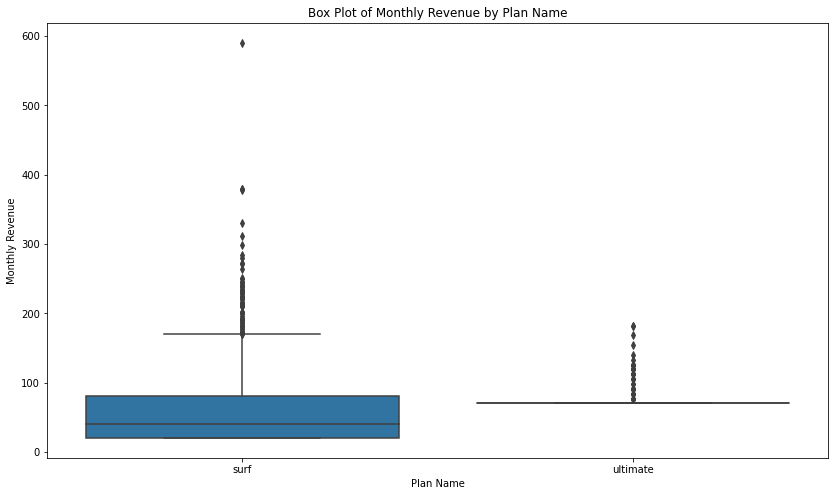

In [ ]:
# plot a boxplot to visualize the distribution of the monthly internet traffic consumed
plt.figure(figsize=(14, 8))
sns.boxplot(x='plan_name', 
            y='monthly_revenue',
            data=df
            )
plt.xlabel('Plan Name')
plt.ylabel('Monthly Revenue')
plt.title('Box Plot of Monthly Revenue by Plan Name')

# show the plot
plt.show()

Building on the previous commentary, the higher mean monthly revenue value generated by Ultimate plan users is supported by the insight from the box plot that shows that the minimum monthly revenue amouont for the Ultimate plan is the $70 monthly charge for that plan. There isn't much much variance in the monthly revenue associated with Ultimate plan users (as evidenced by the flat nature of its box plot) while the upper quartile value for the Surf plan is aligned with the higher outliers for the Ultimate plan. 

We can conclude that while users on the Ultimate plan generate a higher amount of monthly revenue on average, the greater variance among monthly revenue generated by Surf plan users results in a monthly revenue value that exceeded the Ultimate plan's mean for around 25 percent of the Surf plan's sample population.

## Test Statistical Hypotheses

#### Test 1

*_Test the hypothesis that the average revenue from users on the surf calling plan is different from that of the users on the ultimate calling plan._*

H0 (Null Hypothesis): The mean of monthly revenue from users of the Ultimate and Surf calling plans are equal.

H1 (Alternative Hypothesis): The mean of monthly revenue from users of the Ultimate and Surf calling plans are not equal.

In [ ]:
# store monthly revenue values for the surf plan in a variable
surf_samp = df.loc[df['plan_name'] == 'surf', 'monthly_revenue']

# store monthly revenue values for the ultimate plan in a variable
ultimate_samp = df.loc[df['plan_name'] == 'ultimate', 'monthly_revenue']

# set the critical statistical significance level
alpha = 0.05  

# apply the independent two-sample t-test method to surf_samp and ultimate_samp (which have unequal variances)
results = st.ttest_ind(surf_samp, ultimate_samp, equal_var=False)

# print the p-value
print('p-value: ', results.pvalue)

# if the p-value is less than alpha, we reject the hypothesis
if results.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We can't reject the null hypothesis.")

p-value:  1.360830449414963e-18
We reject the null hypothesis.


We reject the null hypothesis because the p-value is below the alpha value of 0.05. The avg. monthly revenue of users on the Ultimate and Surf plans are different (Ultimate plan users generate higher monthly revenue, on average, than Surf users) at statistical significance.

An alpha value of 0.5 is the standard critical statistical significance level. Our hypothesis test accounts for statistical significance between the means of the two samples without specification as to how they may differ (i.e. it does not matter if one sample's mean is higher or lower than the other's at statistical significace).

#### Test 2

*_Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions._*

H0 (Null Hypothesis): The mean of monthly revenue from users in the NY-NJ area is equal to that of users not in the NY-NJ area.

H1 (Alternative Hypothesis): The mean of monthly revenue from users in the NY-NJ area is not equal to that of users not in the NY-NJ area.

In [50]:
# print the mean and variance of monthly revenue of users in the NY-NJ area
print("NY-NJ Area Users:")
print(df[df.city.str.contains('NY-NJ')]['monthly_revenue'].agg(['mean','var']))

print()
print("Non-NY-NJ Area Users:")
# print the mean and variance of monthly revenue of users who are not in the NY-NJ area
print(df[~df.city.str.contains('NY-NJ')]['monthly_revenue'].agg(['mean','var']))

NY-NJ Area Users:
mean      58.73815
var     1816.57806
Name: monthly_revenue, dtype: float64

Non-NY-NJ Area Users:
mean      64.597999
var     2049.392370
Name: monthly_revenue, dtype: float64


In [ ]:
# store monthly revenue values for users in the NY-NJ area in a variable
NY_NJ_samp = df.loc[df['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'monthly_revenue']

# store monthly revenue values for users who are not in the NY-NJ area in a variable
non_NY_NJ_samp = df.loc[df['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'monthly_revenue']

# set the critical statistical significance level
alpha = 0.05  

# apply the independent two-sample t-test method to NY_NJ_samp and non_NY_NJ_samp (which have unequal variances)
results = st.ttest_ind(NY_NJ_samp, non_NY_NJ_samp, equal_var=False)

# print the p-value
print('p-value: ', results.pvalue)

# if the p-value is less than alpha, we reject the hypothesis
if results.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We can't reject the null hypothesis.")

p-value:  0.016591677315480956
We reject the null hypothesis.


We reject the null hypothesis because the p-value is below the alpha value of 0.05. 

The avg. monthly revenue of users in the NY-NJ area and users who are not in the NY-NJ area are different at statistical significance and, more specifically, the mean monthly revenue generated from non-NY-NJ area users was higher than that of NY-NJ users at 64.87 dollars vs. 58.81 dollars, respectively.

Once again, an alpha value of 0.5 is the standard critical statistical significance level. Our hypothsis test accounts for statistical significance between the means of the two samples without specification as to how they may differ (i.e. it does not matter if one sample's mean is higher or lower than the other's at statistical significace).

## Project Conclusion

**By aggregating important plan usage information at the individual user and month grains, and by running hypothesis tests on the mean monthly revenue of our sample populations, we can be *statistically* confident in concluding that Ultimate plan users generate more monthly revenue on average.**

It's interesting to note that between Megaline's two prepaid plans, users' avg. call duration, monthly minutes spent on calls, monthly messages sent, and monthly gb of internet traffic consumed are similar to one another--that is, users actually behave quite similarly in their usage between plans. 

Since the commercial team wishes to use the plan revenue information to adjust their advertising budget--with the goal of increasing the total revenue brought in by their entire client population--we should let them know that the Ultimate plan generates more revenue per user on average. *However*, we should also point out that a much larger share of the current client population is attracted to the Surf plan, which may indicate a desire for flexibility in their monthly plan usage needs and/or that the monthly charge of $70 for the Ultimate plan is simply too high for Surf users. 

Users on the Ultimate plan bring in more monthly revenue on average, by about 12.25 dollars. However, Surf users make up a much larger share of Megaline's user population and have a much larger variance in the monthly revenue amount they generate for Megaline. More than 50% of Surf users exceed the amount of call mins, messages, and internet traffic consumption (in gb) included in their plan and about 25% exceed usage to the degree that their monthly revenue surpasses the monthly/lowest possible charge of the Ultimate plan.

**It is important that the team considers the quantity of users on each plan with the monthly revenue each plan typically generates to plan their advertising budget in a way that balances the value of the high volume of users on the Surf plan and the higher revenue generating tendency of users on the Ultimate plan.**

We recommend conducting further analysis to better understand the demographics of users on the Ultimate plan so the commercial team can target prospective Ultimate clients more effectively via advertising. Alternatively, perhaps it's time to conduct research about prospective clients and gather feedback from existing clients in order to understand what they value most in their plan decisions. Perhaps, changes to the existing plans or a new plan entirely could strike the sweet spot between client volume and montly revenue to bring Megaline's revenue to new heights.







